In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Exploration & Feature Selection & Data Preprocessing

In [24]:
df = pd.read_csv('D:\\iaaa\\tamrina\\tamrin_3\\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


among all attributes only gender must be converted to int and missing value is not needed

In [27]:
df.loc[df['Gender'] == 'Male', 'Gender'] = 0
df.loc[df['Gender'] == 'Female', 'Gender'] = 1

changing the columns names for more convenience :

In [28]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


Male's mean income is higher than Famales

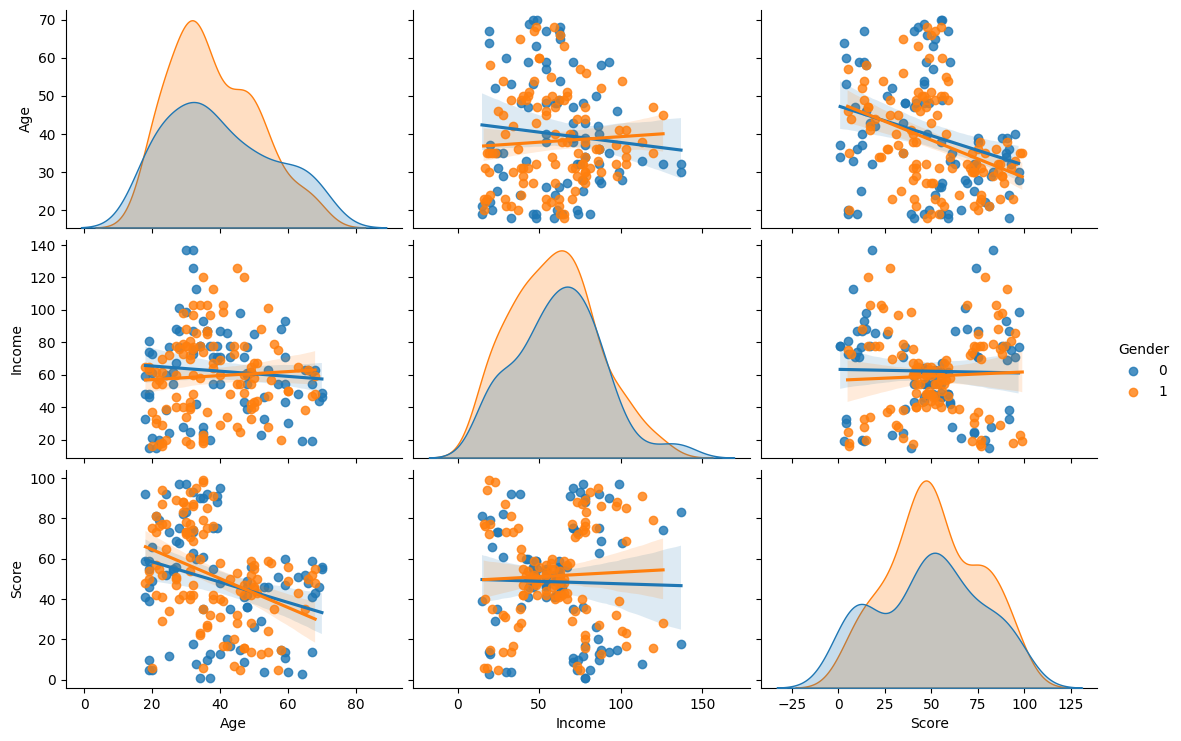

In [29]:
X = df.drop(['CustomerID'], axis=1)
sns.pairplot(df.drop(['CustomerID'], axis=1), hue='Gender', aspect=1.5 ,kind='reg')
plt.show()

In [30]:
X.head()

,Gender,Age,Income,Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [31]:
np.mean(X[X['Gender'] == 0].Income)

62.22727272727273

In [32]:
np.mean(X[X['Gender'] == 1].Income)

59.25

# Clustering Algorithms &  Clustering Analysis

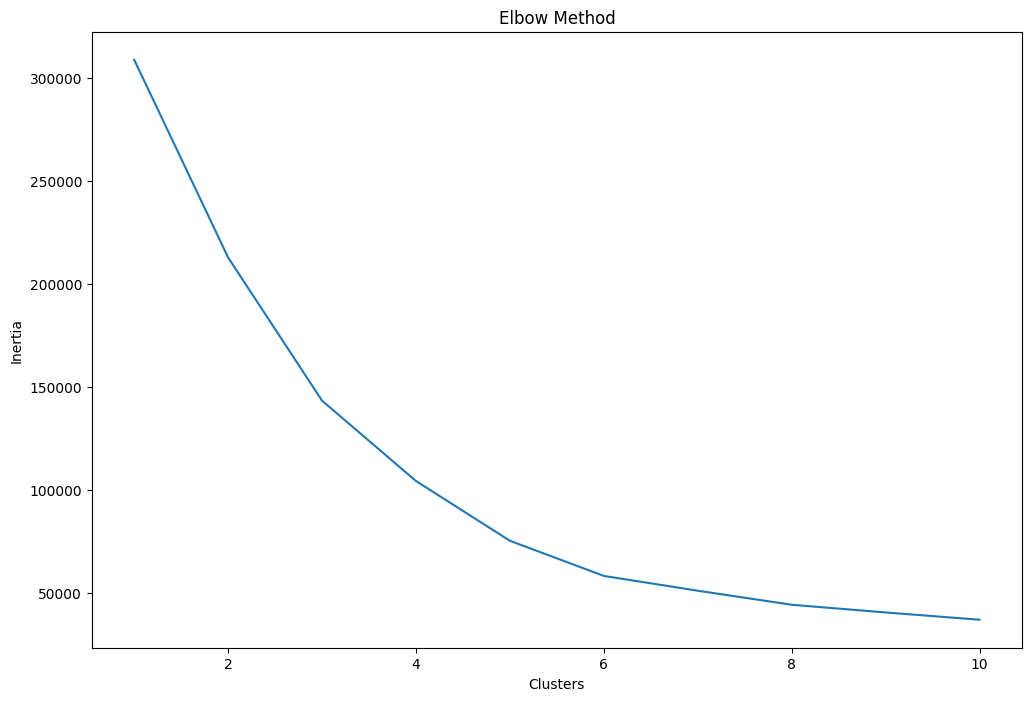

In [33]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x = list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

it seems like 3 and 5 are the best number of clusters , we can test kmeans with these numbers and choose one:

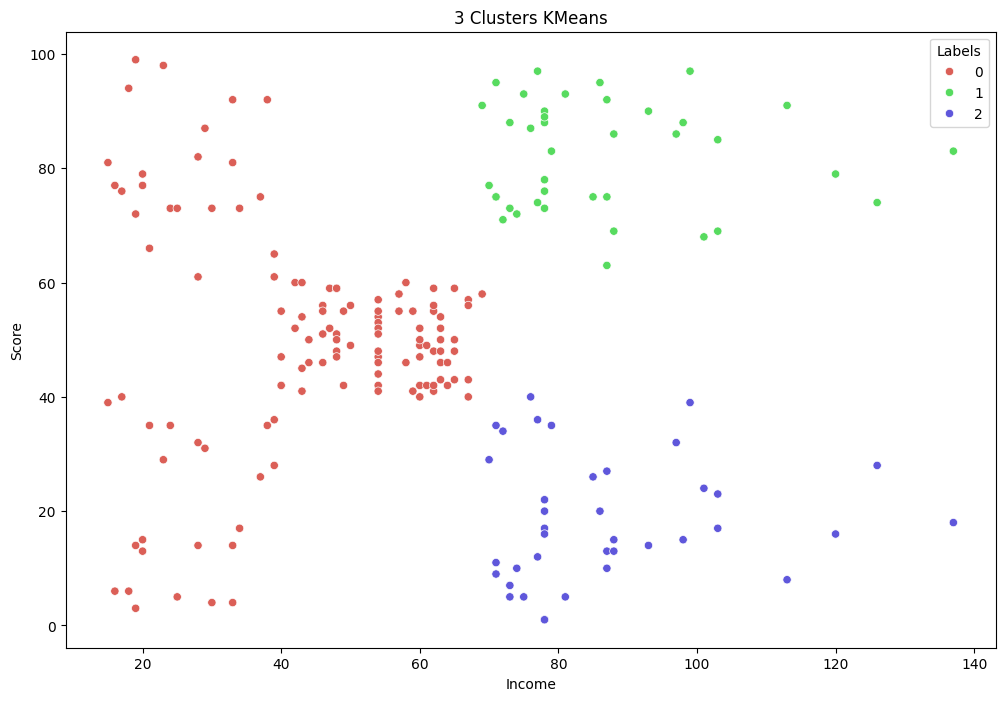

In [34]:
# n_clusters = 3
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3) )
plt.title('3 Clusters KMeans')
plt.show()

<Figure size 2000x2000 with 0 Axes>

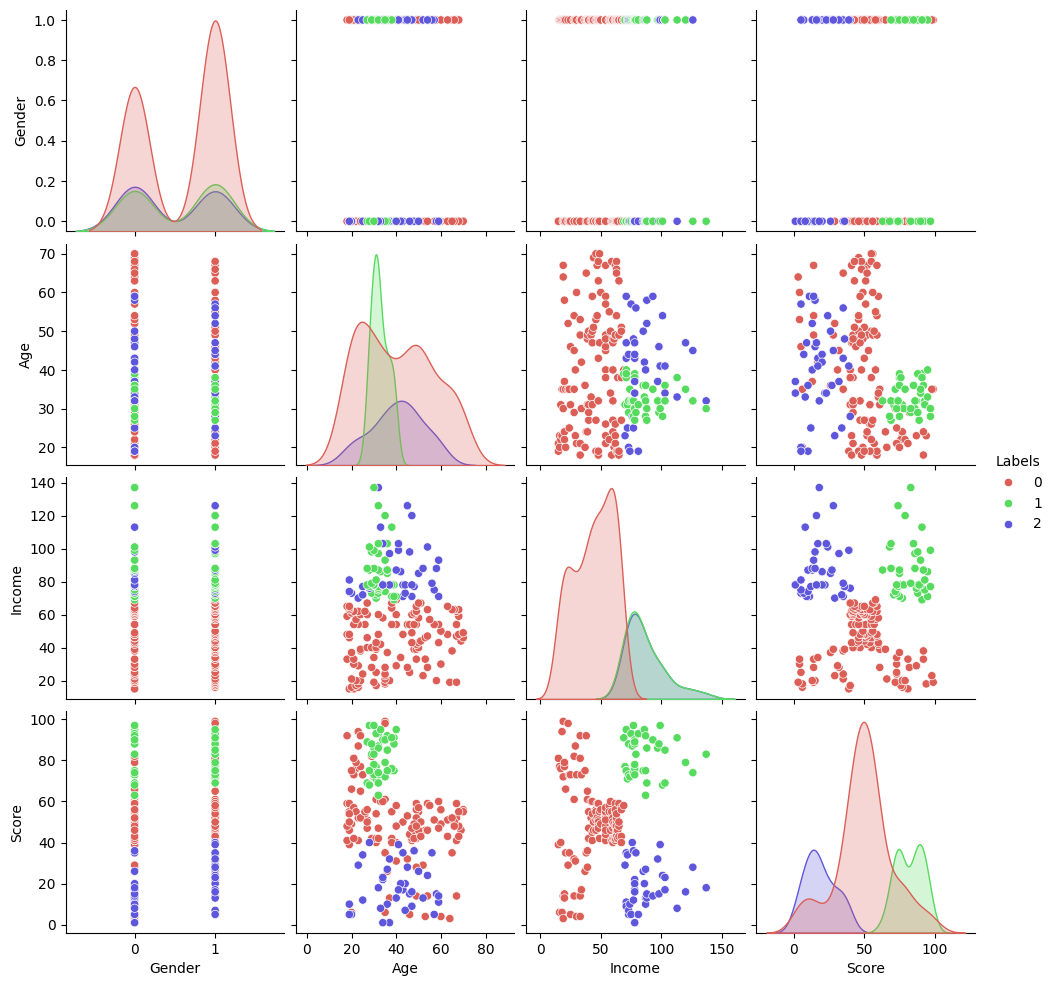

In [35]:
plt.figure(figsize= (20,20))
sns.pairplot(X,hue = 'Labels' ,palette=sns.color_palette('hls',3))
plt.show()

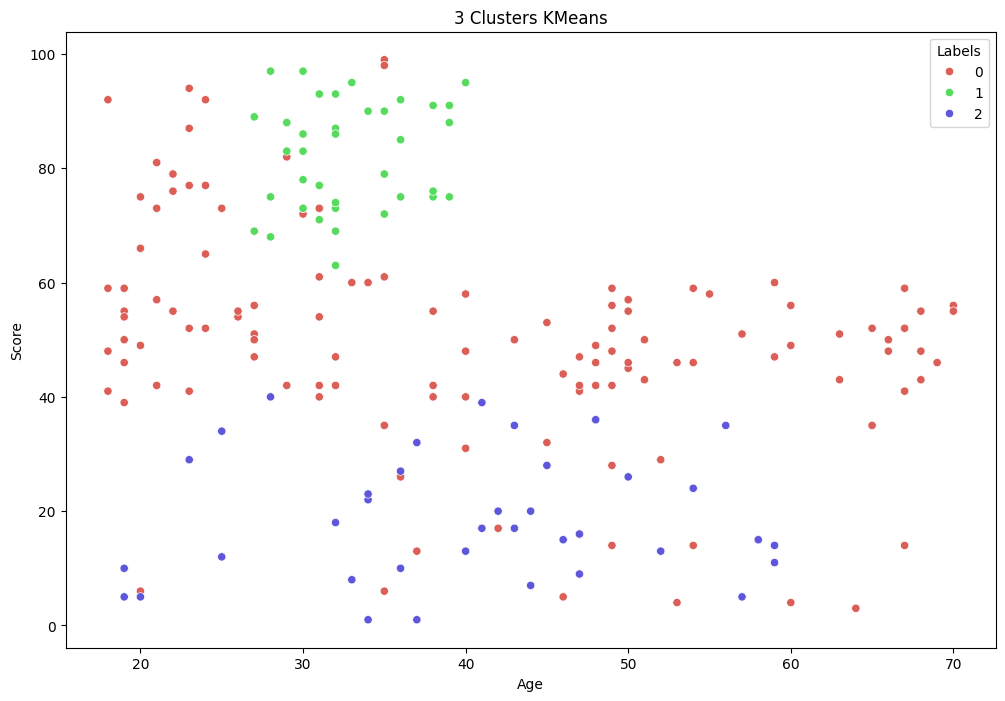

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Age'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('3 Clusters KMeans')
plt.show()

In [37]:
np.mean(X[X['Labels'] == 0].Age)

40.32520325203252

In [38]:
np.mean(X[X['Labels'] == 1].Age)

32.69230769230769

In [39]:
np.mean(X[X['Labels'] == 2].Age)

40.39473684210526

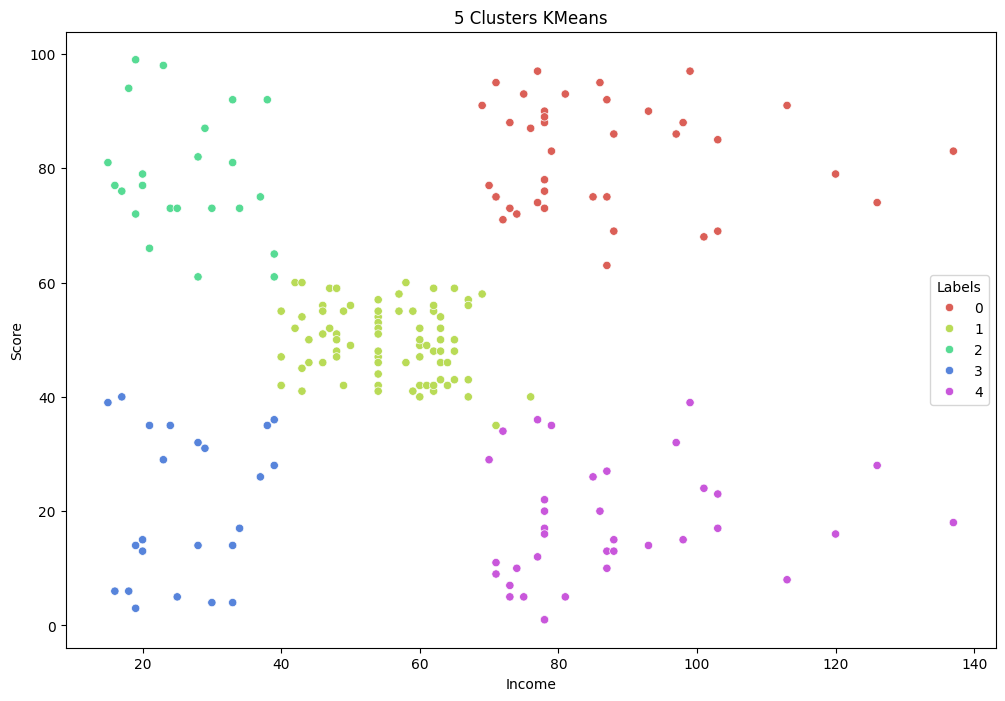

In [40]:
# n_clusters = 5
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('5 Clusters KMeans')
plt.show()

<Figure size 2000x2000 with 0 Axes>

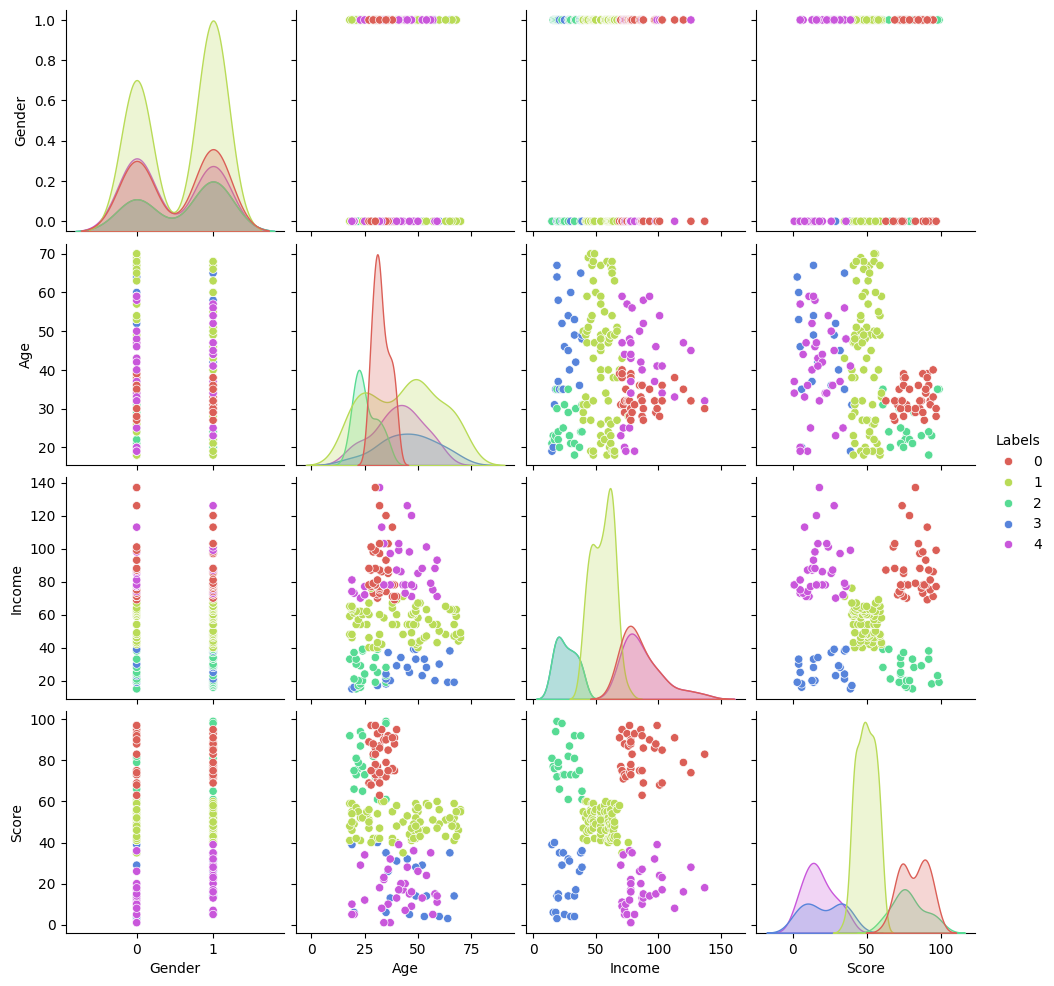

In [41]:
plt.figure(figsize= (20,20))
sns.pairplot(X,hue = 'Labels' ,palette=sns.color_palette('hls',5))
plt.show()

5 clusters is the better number of clusters 

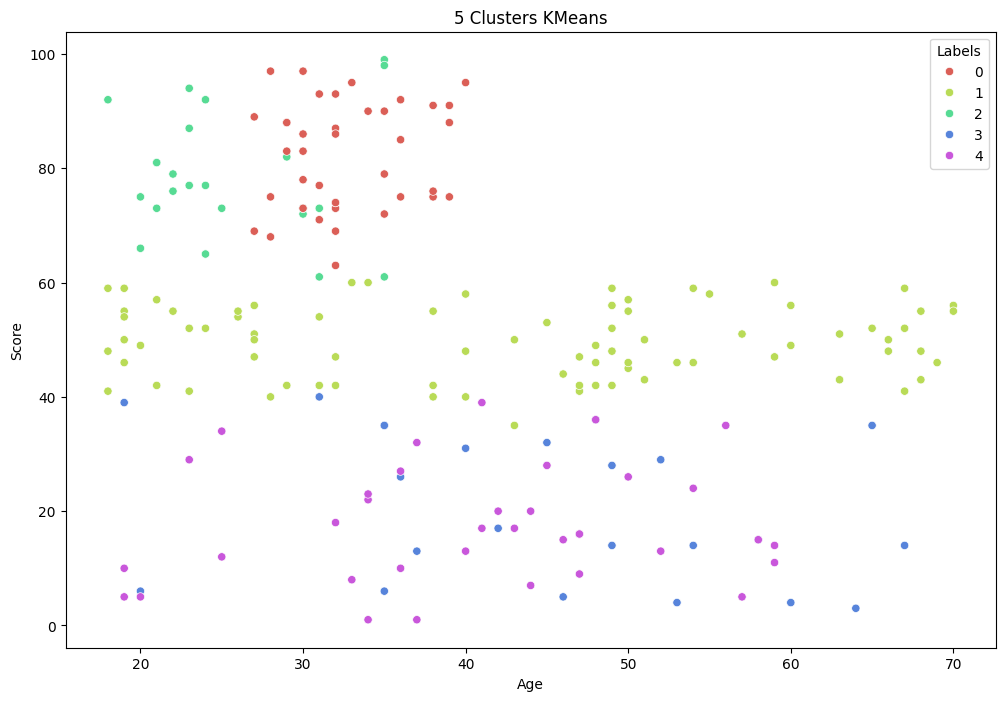

In [42]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Age'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('5 Clusters KMeans')
plt.show()

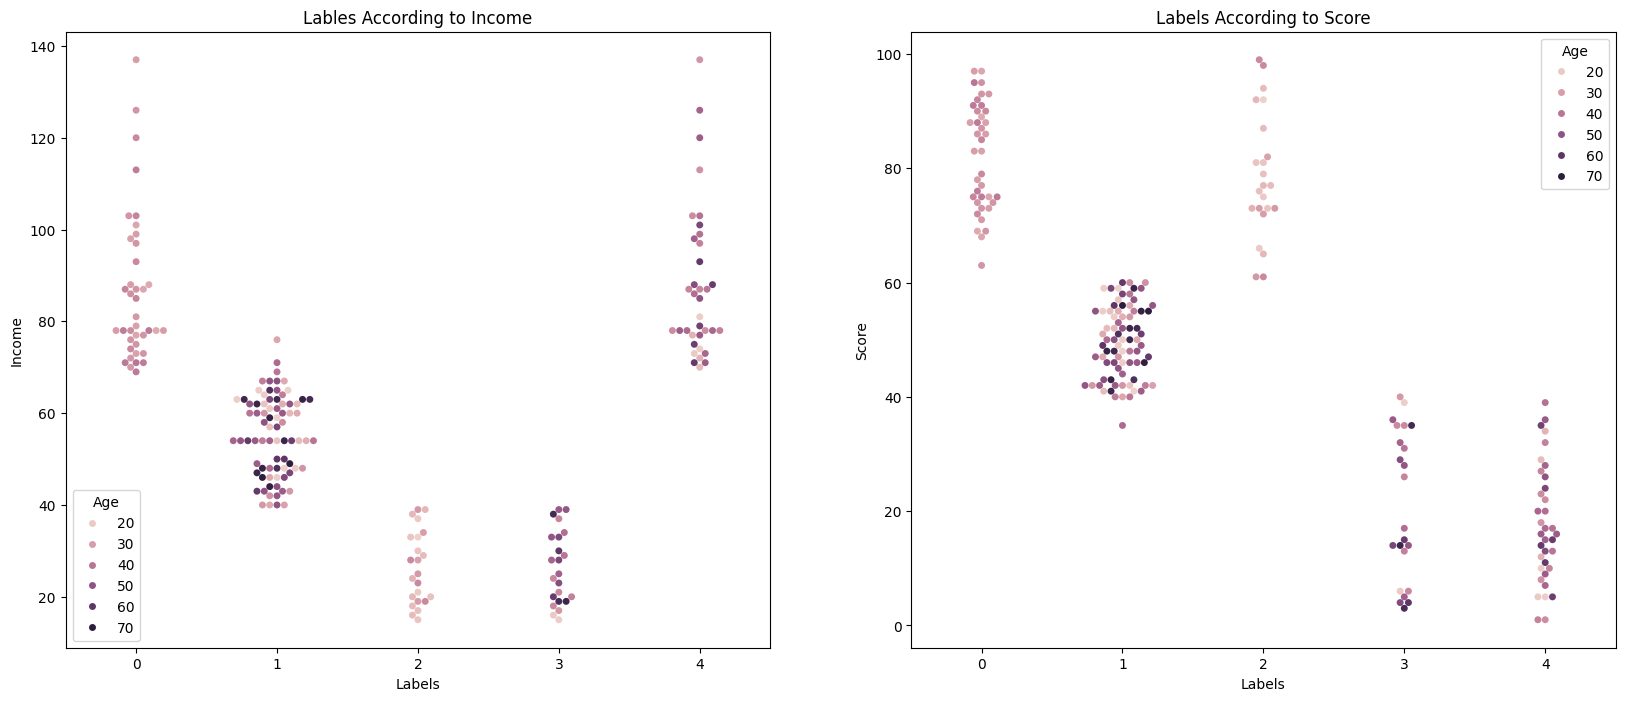

In [43]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y = 'Income', data=X, ax=ax,hue = X['Age'] )
ax.set_title('Lables According to Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax , hue = X['Age'])
ax.set_title('Labels According to Score')

plt.show()

In [44]:
X['Labels'].replace(0, 'Cluster 0').unique()

array([3, 2, 1, 'Cluster 0', 4], dtype=object)

In [45]:
X['Labels'].unique()

array([3, 2, 1, 0, 4])

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
 4   Labels  200 non-null    int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 16.7+ KB


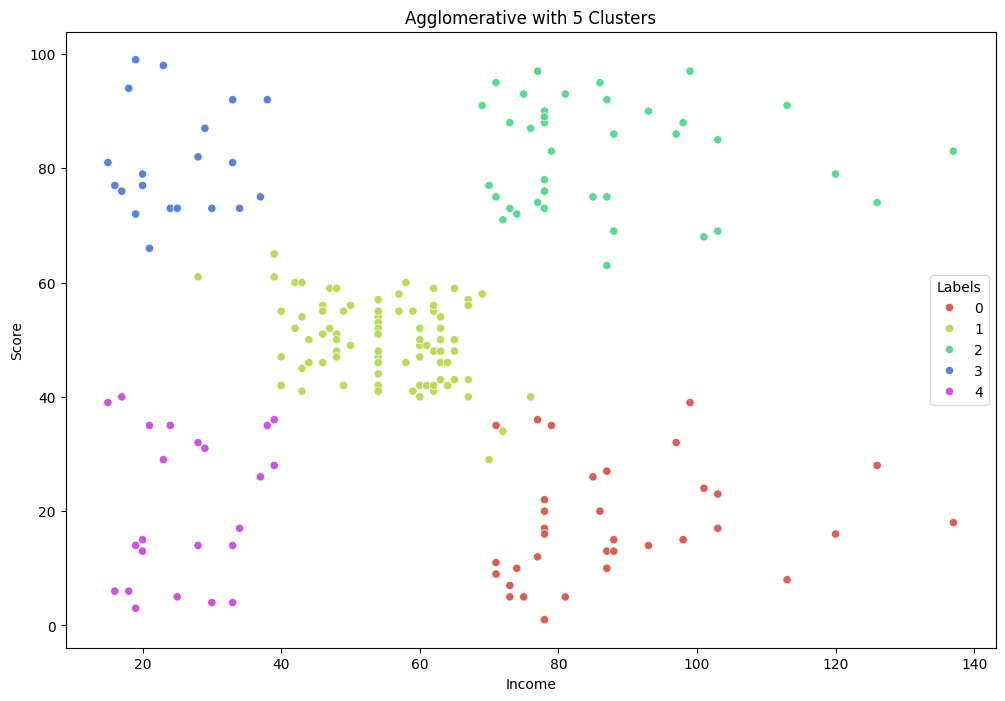

In [47]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X3 = X
X3['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X3['Income'], y=X3['Score'], hue=X3['Labels'], 
                palette=sns.color_palette('hls', 5))

plt.title('Agglomerative with 5 Clusters')
plt.show()

<Figure size 2000x2000 with 0 Axes>

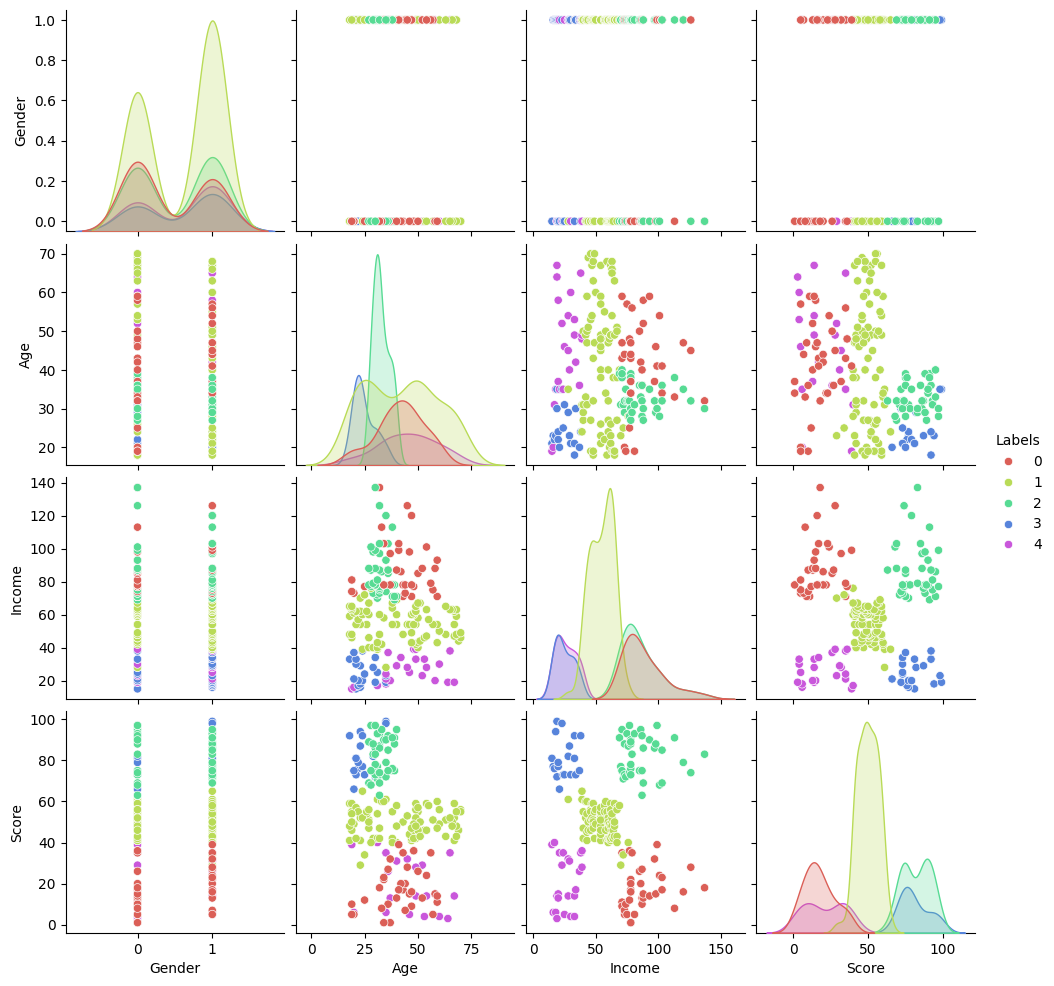

In [48]:
plt.figure(figsize= (20,20))
sns.pairplot(X,hue = 'Labels' ,palette=sns.color_palette('hls',5))
plt.show()

In [49]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X)
print(dist)

[[0.0 42.05948168962618 33.04542328371661 ... 117.12813496338103
  124.53915047084591 130.17296186228538]
 [42.05948168962618 0.0 75.02666192761077 ... 111.76761606118295
  137.7788082398741 122.35195135346228]
 [33.04542328371661 75.02666192761077 0.0 ... 129.8961123359741
  122.25383429569807 143.78803844548406]
 ...
 [117.12813496338103 111.76761606118295 129.8961123359741 ... 0.0
  57.105166141076936 14.352700094407323]
 [124.53915047084591 137.7788082398741 122.25383429569807 ...
  57.105166141076936 0.0 65.06150935845248]
 [130.17296186228538 122.35195135346228 143.78803844548406 ...
  14.352700094407323 65.06150935845248 0.0]]


In [50]:
Z = hierarchy.linkage(dist, 'complete')

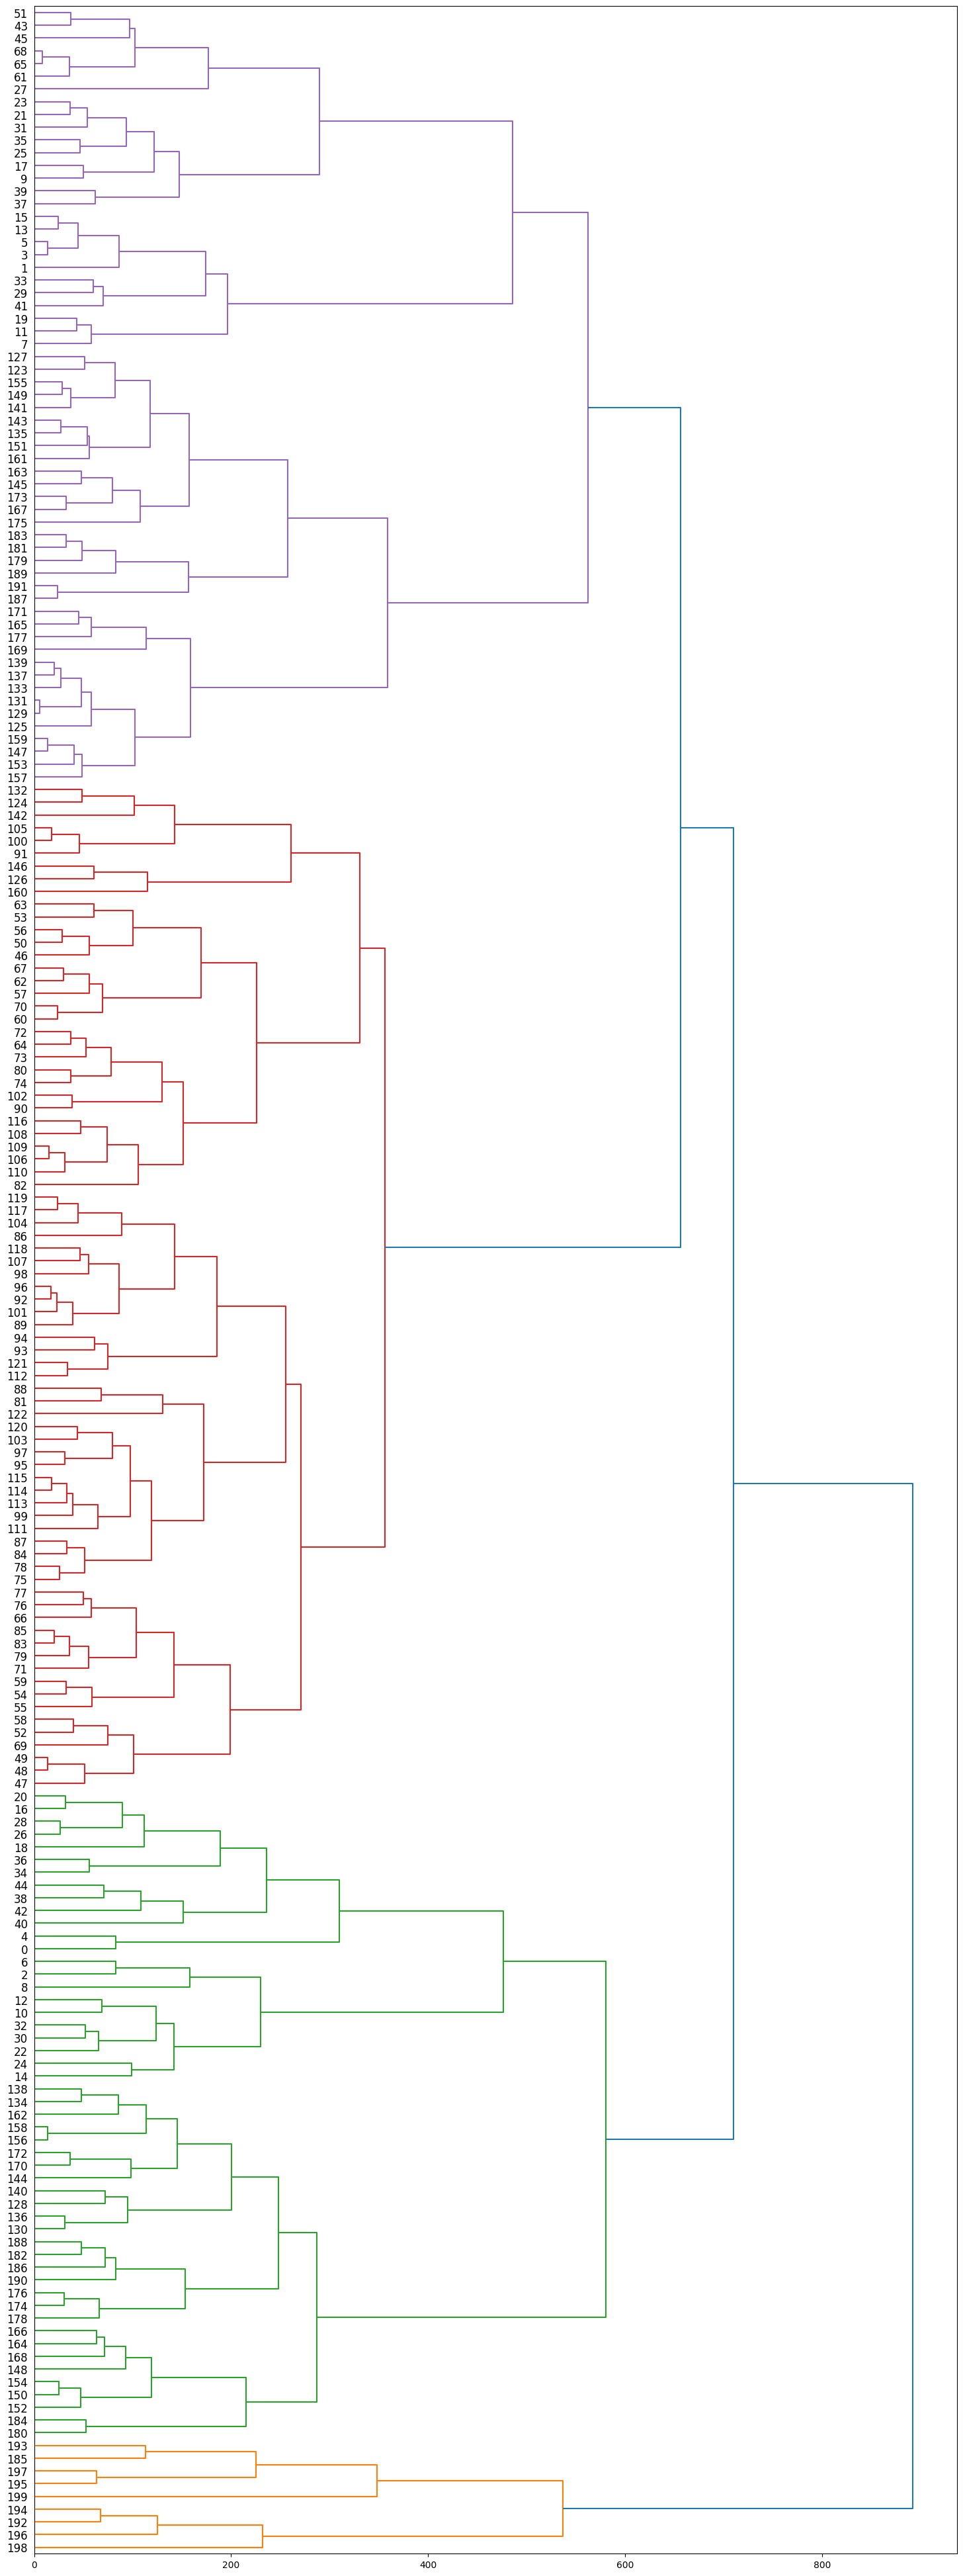

In [51]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

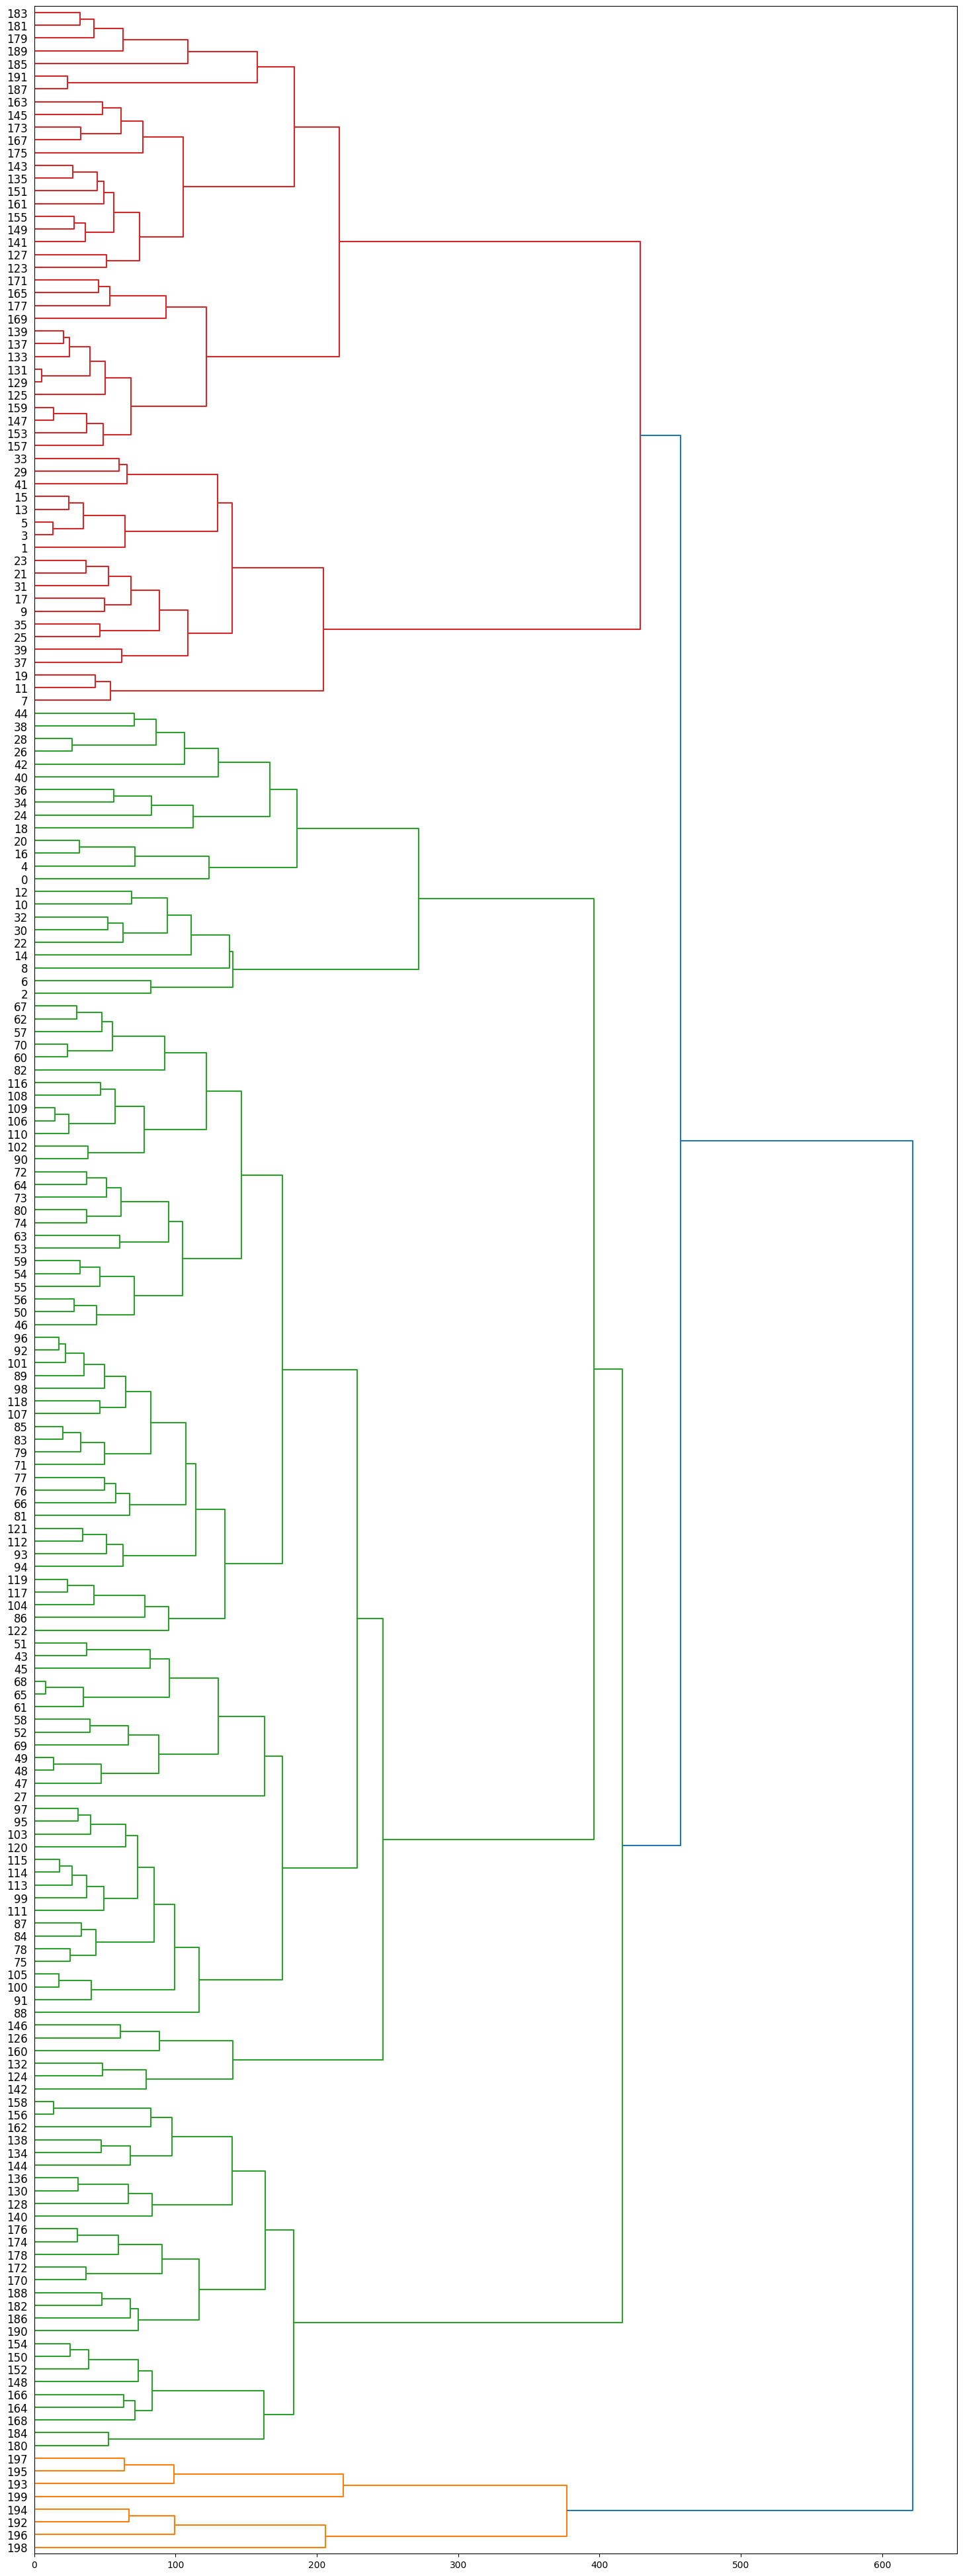

In [52]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

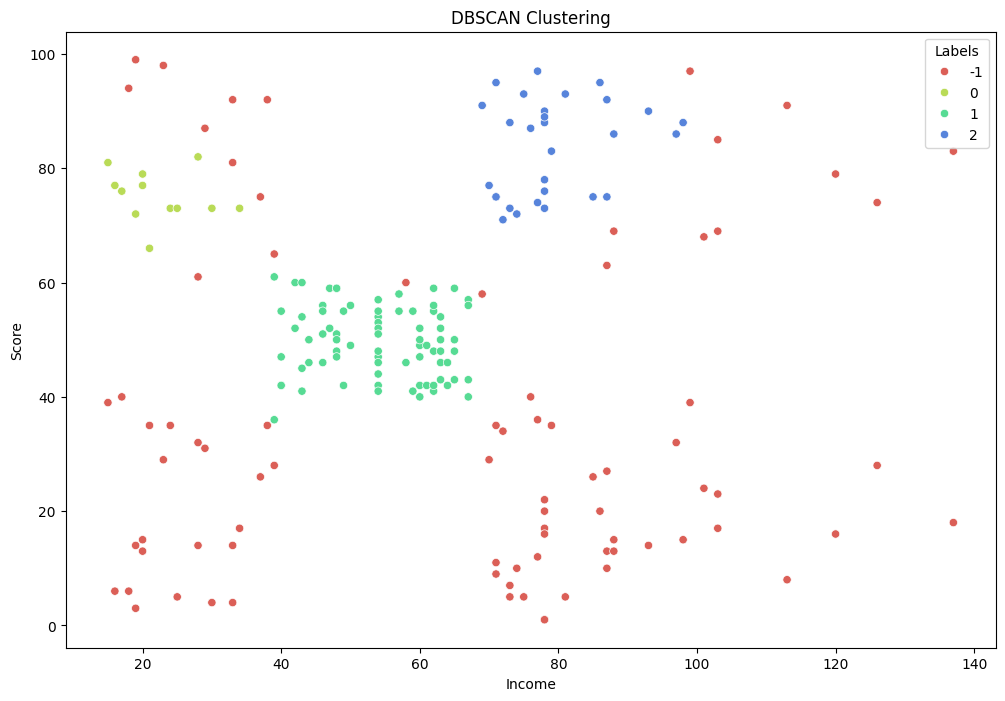

In [53]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=10, min_samples=6).fit(X)

X['Labels'] = db.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))

plt.title('DBSCAN Clustering')
plt.show()

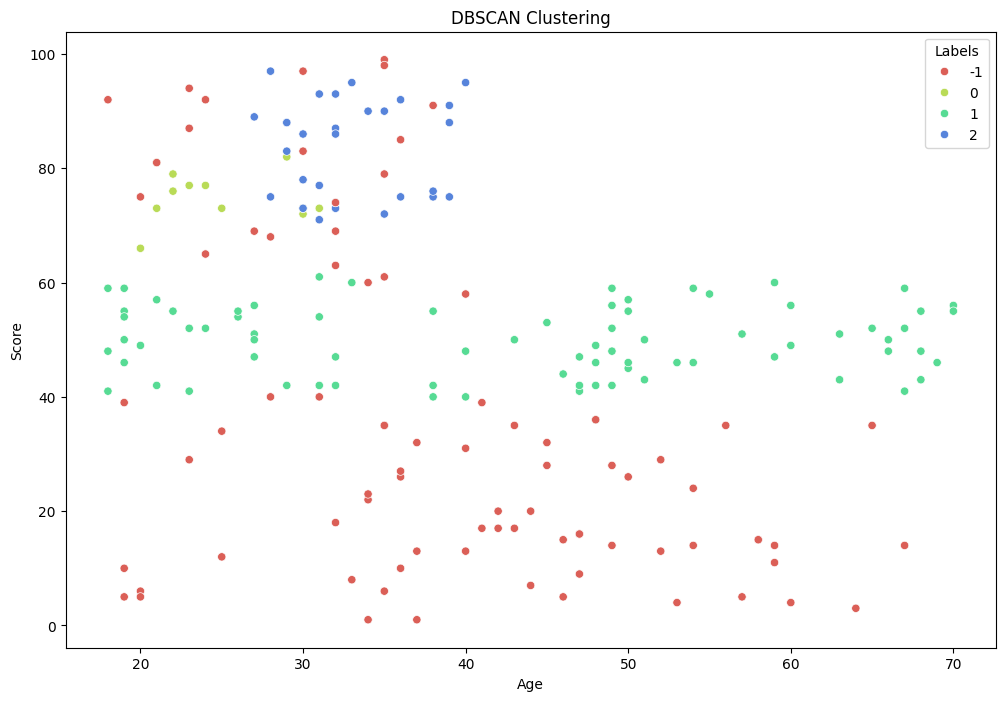

In [54]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Age'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))

plt.title('DBSCAN Clustering')
plt.show()

<Figure size 2000x2000 with 0 Axes>

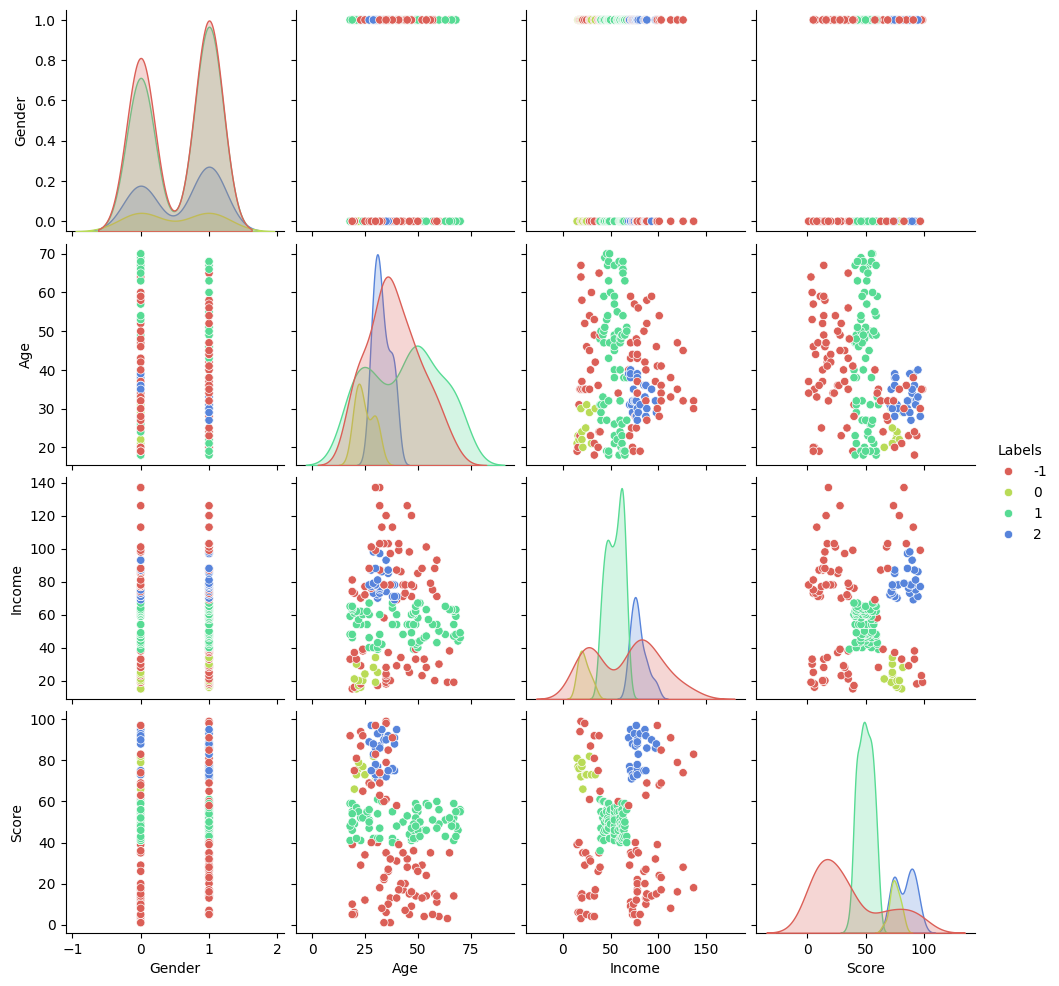

In [55]:
plt.figure(figsize= (20,20))
sns.pairplot(X,hue = 'Labels' ,palette=sns.color_palette('hls',5))
plt.show()

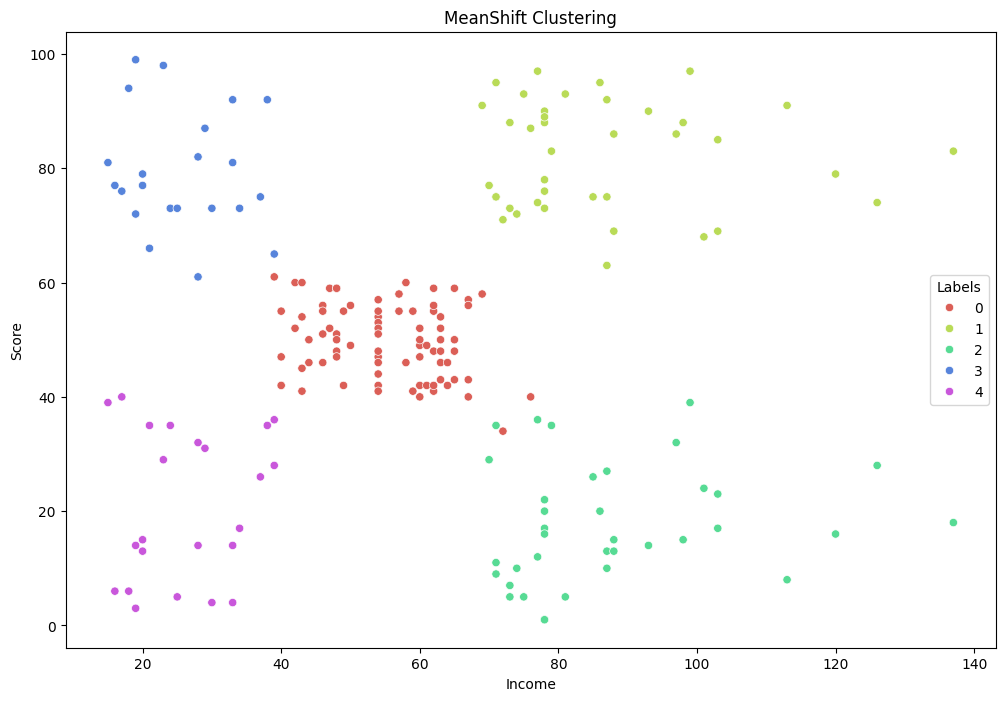

In [56]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))

plt.title('MeanShift Clustering')
plt.show()

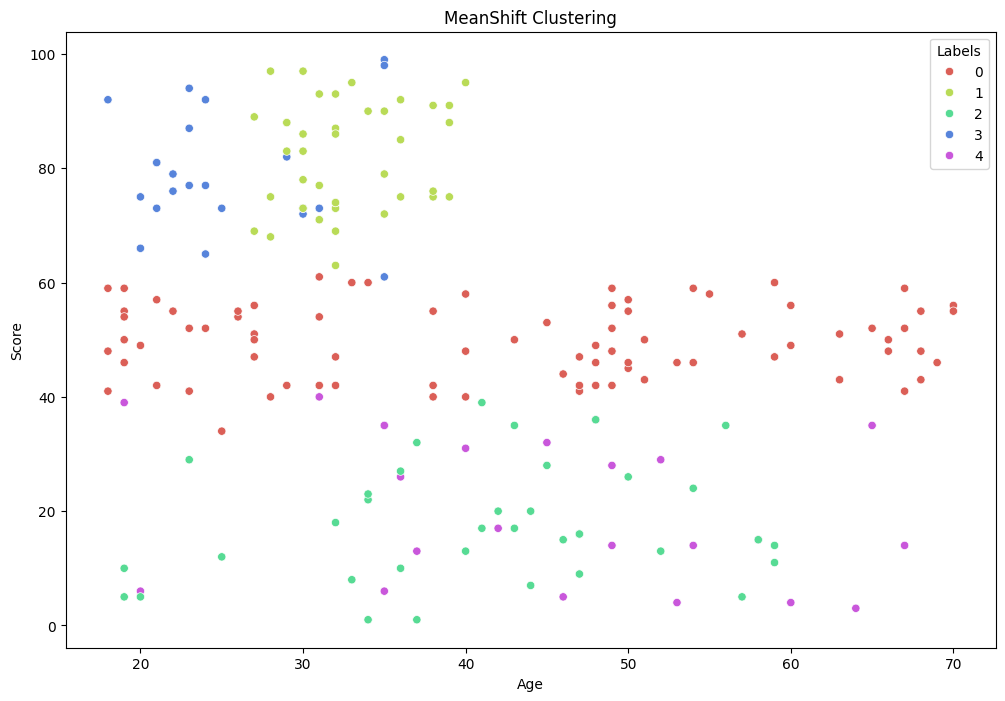

In [57]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Age'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))

plt.title('MeanShift Clustering')
plt.show()

<Figure size 200x200 with 0 Axes>

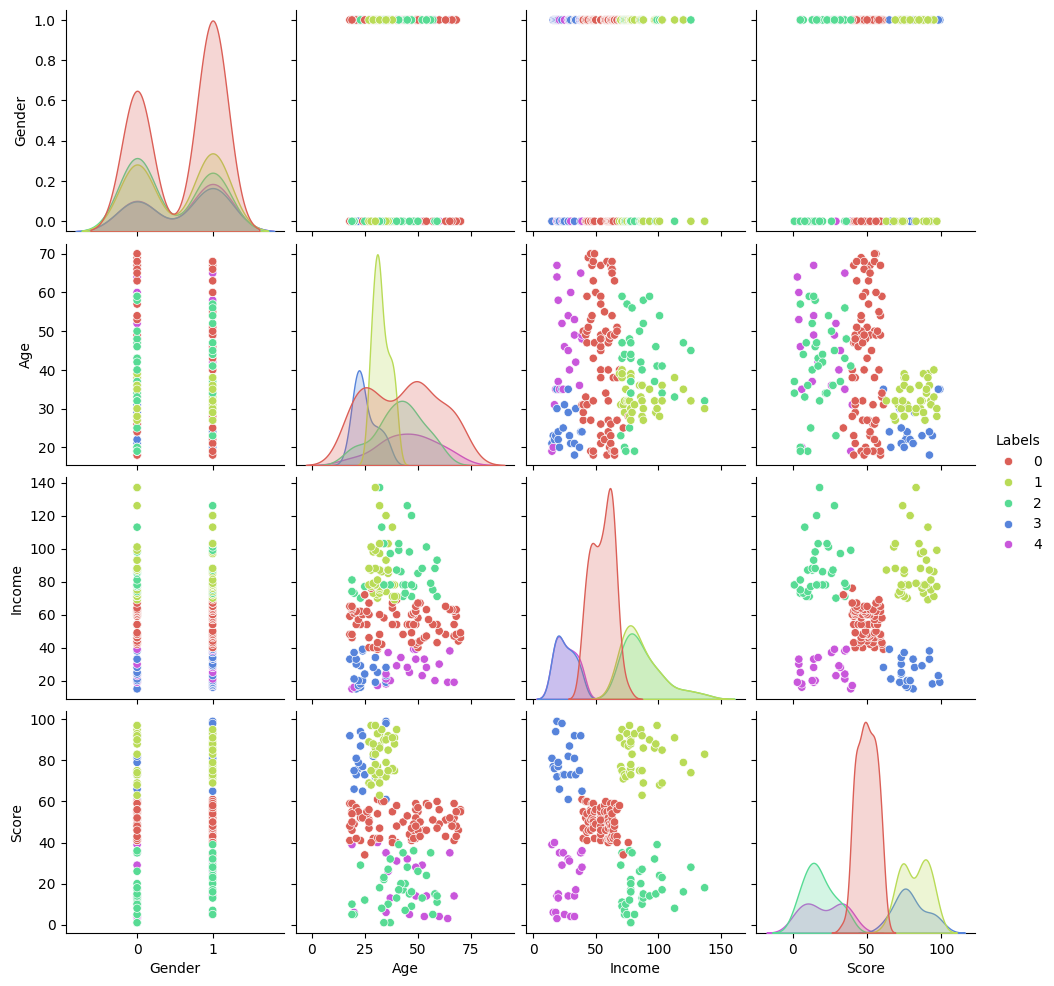

In [58]:
plt.figure(figsize= (2,2))
sns.pairplot(X,hue = 'Labels' ,palette=sns.color_palette('hls',5))
plt.show()

In [59]:
y = X['Labels']
X = df


In [60]:

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
# Create an RBF kernel with a length scale of 1.0
kernel = 1.0 * RBF(1.0)
# Initialize a GaussianProcessClassifier with the RBF kernel
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
# Fit the model to the data
gpc.fit(X, y)
# Evaluate the model's accuracy
accuracy = gpc.score(X, y)
print(f"Model accuracy: {accuracy:.4f}")


Model accuracy: 1.0000


# Evaluation

# Conclusion

among all algorithms MeanShift had better performence especially by using RBF however obviously there is something wrong with 100 accuracy but unfortunately I still dont know what it is 